In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# I. Data Exploration

## 1. Campaigns

In [2]:
campaigns_df = pd.read_csv(os.path.join('dataset', 'actual', 'Campaigns.csv'))

campaigns_df.head(n=1)

,id,name,status,numOfLeads,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,userId,useFirstName,deleted,...,secondFollowUpsSent,invitesWithdrawn,createdAt,updatedAt,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent,type,useScraperAccounts
0,169,Jennings-Scott Walker-Molina,STOPPED,0,0,0,0,4,f,f,...,0,0,2023-09-29 14:34:46.105+00,2023-10-04 08:01:25.656+00,0,0,0,0,EmailTargetMarket,t


In [3]:
print(campaigns_df.info())
print(campaigns_df.describe())
print(campaigns_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       146 non-null    int64 
 1   name                     146 non-null    object
 2   status                   146 non-null    object
 3   numOfLeads               146 non-null    int64 
 4   numOfInvitesSent         146 non-null    int64 
 5   numOfInvitesAccepted     146 non-null    int64 
 6   numOfRepliesReceived     146 non-null    int64 
 7   userId                   146 non-null    int64 
 8   useFirstName             146 non-null    object
 9   deleted                  146 non-null    object
 10  lastScheduledToScrapeAt  128 non-null    object
 11  minimumInvites           146 non-null    int64 
 12  maximumInvites           146 non-null    int64 
 13  firstFollowUpsSent       146 non-null    int64 
 14  secondFollowUpsSent      146 non-null    i

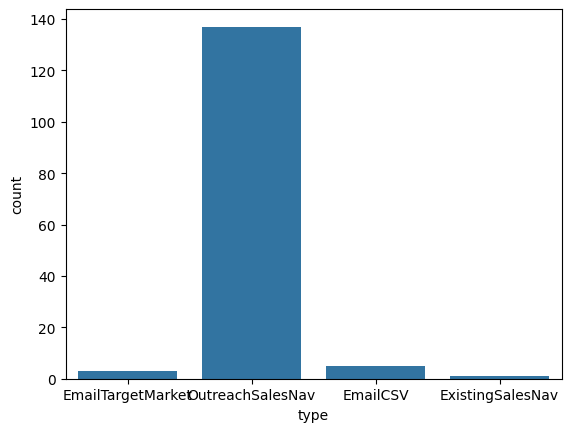

In [4]:
sns.countplot(x='type', data=campaigns_df)
plt.show()

The plot above shows that the highest amounts of campaigns is of type `OutreachSalesNav`.
We will only consider that and ignore the rest.

## 2. Leads

In [5]:
leads_df = pd.read_csv(os.path.join('dataset', 'actual', 'Leads.csv'))

leads_df.head(n=1)

/tmp/ipykernel_638542/881938342.py:1: DtypeWarning: Columns (23,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  leads_df = pd.read_csv(os.path.join('dataset', 'actual', 'Leads.csv'))


,id,userId,campaignId,name,firstName,lastName,gender,email,companyName,title,...,fifthFollowUpSentAt,sixthFollowUpSentAt,emailFollowUpThreadId,firstEmailFollowUpSentAt,secondEmailFollowUpSentAt,existingMessagesCount,inviteAttempts,skip,cdsEmployeeId,skipReason
0,42882,4,150,Tyrus Parker,Angella,Zemlak,male,ab@alexbetz.de,PATRIZIA AG,-,...,NaN,NaN,NaN,NaN,NaN,NaN,0,f,NaN,NaN


In [6]:
print(leads_df.info())
print(leads_df.describe())
print(leads_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59609 entries, 0 to 59608
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         59609 non-null  int64  
 1   userId                     59609 non-null  int64  
 2   campaignId                 59609 non-null  int64  
 3   name                       59609 non-null  object 
 4   firstName                  59609 non-null  object 
 5   lastName                   59609 non-null  object 
 6   gender                     59609 non-null  object 
 7   email                      39686 non-null  object 
 8   companyName                59609 non-null  object 
 9   title                      59609 non-null  object 
 10  city                       59609 non-null  object 
 11  country                    59609 non-null  object 
 12  location                   59609 non-null  object 
 13  inviteSentAt               42112 non-null  obj

## 3. Messages

In [7]:
messages_df = pd.read_csv(os.path.join('dataset', 'actual', 'Messages.csv'))

messages_df.head(n=1)

,order,campaignId,name,content,maleSalutation,femaleSalutation,interval,createdAt,updatedAt,type
0,0,124,Initial contact message,{{ salutation }} {{ first_name }}\nin den aktu...,Moin,Moin,NaN,2023-02-01 14:47:41.448+00,2023-02-01 14:47:41.448+00,LINKEDIN


In [8]:
print(messages_df.info())
print(messages_df.describe())
print(messages_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order             434 non-null    int64  
 1   campaignId        434 non-null    int64  
 2   name              434 non-null    object 
 3   content           434 non-null    object 
 4   maleSalutation    364 non-null    object 
 5   femaleSalutation  364 non-null    object 
 6   interval          282 non-null    float64
 7   createdAt         434 non-null    object 
 8   updatedAt         434 non-null    object 
 9   type              434 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 34.0+ KB
None
            order  campaignId    interval
count  434.000000  434.000000  282.000000
mean     1.126728   93.029954    4.141844
std      1.078908   48.827325    6.520792
min      0.000000    1.000000    1.000000
25%      0.000000   54.250000    1.000000
50%      1.

## 4. Records

In [9]:
records_df = pd.read_csv(os.path.join('dataset', 'actual', 'Records.csv'))

records_df.head(n=1)

,id,campaignId,userId,status,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,firstFollowUpsSent,secondFollowUpsSent,invitesWithdrawn,minimumInvites,maximumInvites,createdAt,updatedAt,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent
0,1,54,4,ACTIVE,507,124,68,32,14,117,8,14,2022-05-09 19:00:00.226+00,2022-05-09 19:00:00.226+00,0,0,0,0


In [10]:
print(records_df.info())
print(records_df.describe())
print(records_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63638 entries, 0 to 63637
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    63638 non-null  int64 
 1   campaignId            63638 non-null  int64 
 2   userId                63638 non-null  int64 
 3   status                63638 non-null  object
 4   numOfInvitesSent      63638 non-null  int64 
 5   numOfInvitesAccepted  63638 non-null  int64 
 6   numOfRepliesReceived  63638 non-null  int64 
 7   firstFollowUpsSent    63638 non-null  int64 
 8   secondFollowUpsSent   63638 non-null  int64 
 9   invitesWithdrawn      63638 non-null  int64 
 10  minimumInvites        63638 non-null  int64 
 11  maximumInvites        63638 non-null  int64 
 12  createdAt             63638 non-null  object
 13  updatedAt             63638 non-null  object
 14  thirdFollowUpsSent    63638 non-null  int64 
 15  fourthFollowUpsSent   63638 non-null

## 5. Users

In [11]:
users_df = pd.read_csv(os.path.join('dataset', 'actual', 'Users.csv'))

users_df.head(n=1)

,id,companyName,email,role,userBoughtCredit,userUsedCredit,createdAt,updatedAt
0,57,"Stone, Fitzgerald and Aguilar",kimberlyjohnson@kirk.net,User,1000,572,2022-11-23 11:02:44.495+00,2023-05-15 11:53:02.237+00


In [12]:
print(users_df.info())
print(users_df.describe())
print(users_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                37 non-null     int64 
 1   companyName       37 non-null     object
 2   email             37 non-null     object
 3   role              37 non-null     object
 4   userBoughtCredit  37 non-null     int64 
 5   userUsedCredit    37 non-null     int64 
 6   createdAt         37 non-null     object
 7   updatedAt         37 non-null     object
dtypes: int64(3), object(5)
memory usage: 2.4+ KB
None
              id  userBoughtCredit  userUsedCredit
count  37.000000         37.000000       37.000000
mean   28.729730       1728.432432     1130.837838
std    19.309826       1854.242831     1603.913106
min     4.000000        500.000000        0.000000
25%    13.000000       1000.000000      407.000000
50%    25.000000       1000.000000      635.000000
75%    34.000000       165

# II. Data Preprocessing

## 1. Campaigns

### a. Cleaning

In [13]:
# Only consider the type "OutreachSalesNav" for campaigns
campaigns_df = campaigns_df[campaigns_df['type'] == 'OutreachSalesNav']

In [14]:
campaigns_df = campaigns_df.drop(
    [
        # "id", this is needed since the relationship between the campaigns and the leads is based on this column
        "status",
        "name",
        "type", # only consider the type "OutreachSalesNav"
        "useFirstName", # deprecated, using the Message table instead
        "useScraperAccounts", # scraper related
        "userId",
        "deleted",
        "lastScheduledToScrapeAt", # scraper related
        "createdAt",
        "updatedAt",
    ],
    axis=1,
    errors="ignore",
)

In [15]:
print(campaigns_df.info())
campaigns_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 145
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    137 non-null    int64
 1   numOfLeads            137 non-null    int64
 2   numOfInvitesSent      137 non-null    int64
 3   numOfInvitesAccepted  137 non-null    int64
 4   numOfRepliesReceived  137 non-null    int64
 5   minimumInvites        137 non-null    int64
 6   maximumInvites        137 non-null    int64
 7   firstFollowUpsSent    137 non-null    int64
 8   secondFollowUpsSent   137 non-null    int64
 9   invitesWithdrawn      137 non-null    int64
 10  thirdFollowUpsSent    137 non-null    int64
 11  fourthFollowUpsSent   137 non-null    int64
 12  fifthFollowUpsSent    137 non-null    int64
 13  sixthFollowUpsSent    137 non-null    int64
dtypes: int64(14)
memory usage: 16.1 KB
None


,id,numOfLeads,numOfInvitesSent,numOfInvitesAccepted,numOfRepliesReceived,minimumInvites,maximumInvites,firstFollowUpsSent,secondFollowUpsSent,invitesWithdrawn,thirdFollowUpsSent,fourthFollowUpsSent,fifthFollowUpsSent,sixthFollowUpsSent
1,19,904,110,171,95,1,5,35,29,89,0,0,0,0
2,113,40266,2596,672,129,9,15,588,0,1480,0,0,0,0
3,104,163,166,74,38,3,6,25,10,145,0,0,0,0
4,76,635,533,45,19,3,6,38,32,467,0,0,0,0
5,124,0,0,0,0,3,8,0,0,0,0,0,0,0


## 2. Leads

### a. Cleaning

In [16]:
# Delete the leads that never received an invite
leads_df = leads_df.dropna(subset=['inviteSentAt'])

In [17]:
leads_df = leads_df.drop(
    [
        # "campaignId", this is needed since the relationship between the campaigns and the leads is based on this column
        "id",
        "userId",
        "name",
        "firstName",
        "lastName",
        "companyName",
        "email",
        "createdAt",
        "updatedAt",
        "emailFollowUpThreadId", # related to email campaign
        "firstEmailFollowUpSentAt", # related to email campaign
        "secondEmailFollowUpSentAt", # related to email campaign
        "cdsEmployeeId", # related to email campaign
        "skipReason",
        "existingMessagesCount", # related to another campaign type
        "inviteAttempts", # not relevant
        "skip", # already cleaned by dropping the rows with no inviteSentAt
        "sixthFollowUpSentAt", # this is almost never reachable, leads reply within 5 follow ups (null in the dataset)
    ],
    axis=1,
    errors="ignore",
)

In [18]:
print(leads_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42112 entries, 13 to 59608
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   campaignId            42112 non-null  int64 
 1   gender                42112 non-null  object
 2   title                 42112 non-null  object
 3   city                  42112 non-null  object
 4   country               42112 non-null  object
 5   location              42112 non-null  object
 6   inviteSentAt          42112 non-null  object
 7   inviteAccepted        42112 non-null  object
 8   inviteWithdrawnAt     26600 non-null  object
 9   firstFollowUpSentAt   7137 non-null   object
 10  secondFollowUpSentAt  4773 non-null   object
 11  replied               42112 non-null  object
 12  thirdFollowUpSentAt   834 non-null    object
 13  fourthFollowUpSentAt  352 non-null    object
 14  fifthFollowUpSentAt   19 non-null     object
dtypes: int64(1), object(14)
memory usage: 5.

### b. Processing

In [19]:
# Transforming to boolean columns where applicable (null = False, not null = True)
column_name_mapping = {
    "inviteSentAt": "isInviteSent",
    "inviteAccepted": "isInviteAccepted",
    "inviteWithdrawnAt": "isInviteWithdrawn",
    "firstFollowUpSentAt": "isFirstFollowUpSent",
    "secondFollowUpSentAt": "isSecondFollowUpSent",
    "replied": "isReplied",
    "thirdFollowUpSentAt": "isThirdFollowUpSent",
    "fourthFollowUpSentAt": "isFourthFollowUpSent",
    "fifthFollowUpSentAt": "isFifthFollowUpSent",
}

# Transform the columns
for old_name, new_name in column_name_mapping.items():
    leads_df[new_name] = ~leads_df[old_name].isnull()

leads_df = leads_df.drop(column_name_mapping.keys(), axis=1)

# Simple clean up not to clutter the jupyter variables
del old_name, new_name, column_name_mapping

In [20]:
# Encode the genre with one-hot encoding
leads_df = pd.get_dummies(leads_df, columns=['gender'])

In [21]:
# Encode the other categorical columns with label encoding
label_encoder = LabelEncoder()
categorical_columns = ['title', 'city', 'country', 'location']
for column in categorical_columns:
    leads_df[column] = label_encoder.fit_transform(leads_df[column])

del label_encoder, categorical_columns

In [22]:
print(leads_df.info())
leads_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42112 entries, 13 to 59608
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaignId            42112 non-null  int64
 1   title                 42112 non-null  int64
 2   city                  42112 non-null  int64
 3   country               42112 non-null  int64
 4   location              42112 non-null  int64
 5   isInviteSent          42112 non-null  bool 
 6   isInviteAccepted      42112 non-null  bool 
 7   isInviteWithdrawn     42112 non-null  bool 
 8   isFirstFollowUpSent   42112 non-null  bool 
 9   isSecondFollowUpSent  42112 non-null  bool 
 10  isReplied             42112 non-null  bool 
 11  isThirdFollowUpSent   42112 non-null  bool 
 12  isFourthFollowUpSent  42112 non-null  bool 
 13  isFifthFollowUpSent   42112 non-null  bool 
 14  gender_female         42112 non-null  bool 
 15  gender_male           42112 non-null  bool 
dtypes: bool(

,campaignId,title,city,country,location,isInviteSent,isInviteAccepted,isInviteWithdrawn,isFirstFollowUpSent,isSecondFollowUpSent,isReplied,isThirdFollowUpSent,isFourthFollowUpSent,isFifthFollowUpSent,gender_female,gender_male
13,118,5083,1180,94,1517,True,True,True,False,False,True,False,False,False,False,True
15,136,1316,3950,94,4965,True,True,True,False,False,True,False,False,False,False,True
17,157,5562,1180,94,1517,True,True,False,False,False,True,False,False,False,False,True
22,148,16769,1033,71,1326,True,True,False,False,False,True,False,False,False,True,False
25,144,3798,3204,94,4040,True,True,False,False,False,True,False,False,False,False,True


## 3. Messages

## 4. Records

# III. Feature Engineering

# IV. Model Selection

# V. Model Training

# VI. Model Evaluation

# VII. Interpretation

TODO:

- Deployment
- Documentation
- Presentation